In [8]:
import altair as alt
from altair import Chart
from vega_datasets import data
import numpy as np
import pandas as pd
import folium
from folium import plugins

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
sf_data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/sample_data/master/sf311.csv')
sf_data.head()

,unique_key,created_date,closed_date,resolution_action_updated_date,status,status_notes,agency_name,category,complaint_type,descriptor,incident_address,supervisor_district,neighborhood,location,source,media_url,latitude,longitude,police_district
0,11511140,2019-10-06 00:05:55 UTC,2019-10-06 00:14:00 UTC,2019-10-06 00:14:00 UTC,Closed,To report unreasonable noise problems IN PROGR...,311 Supervisor Queue,Noise Report,Noise Issue,Other,"575 LOS PALMOS DR, SAN FRANCISCO, CA, 94127",7,Sherwood Forest,POINT (-122.45468056 37.73449882),Mobile/Open311,NaN,37.734499,-122.454681,INGLESIDE
1,11466346,2019-09-25 18:19:00 UTC,2019-09-26 07:19:00 UTC,2019-09-26 07:19:00 UTC,Closed,NOT A STREETLIGHT ISSUE / TRANSFERRED TO FIELD...,PG and E - Streetlights Queue,311 External Request,Utility Lines/Wires,Utility Lines/Wires,Intersection of HUNTERS POINT BLVD and HAWES ST,10,India Basin,POINT (-122.37697601 37.73361588),Phone,NaN,37.733616,-122.376976,BAYVIEW
2,11653399,2019-11-06 10:28:00 UTC,NaN,2019-11-06 10:45:09 UTC,Open,open,MUNI Work Queue,MUNI Feedback,MUNI - Services_Criminal_Activity,502_Larceny_Theft,Intersection of GEARY BLVD and LAGUNA ST,5,Japantown,POINT (-122.42798615 37.78495407),Phone,NaN,37.784954,-122.427986,NORTHERN
3,11501727,2019-10-03 17:23:25 UTC,2019-10-30 05:11:35 UTC,2019-10-30 05:11:35 UTC,Closed,case is resolved,DPT SignShop Repair Queue,Sign Repair,Sign Repair - Missing,Other - Missing; support - Bent,Intersection of HUDSON AVE and TOLAND ST,10,Produce Market,POINT (-122.39754233 37.74537037),Mobile/Open311,NaN,37.745370,-122.397542,BAYVIEW
4,10576131,2019-03-07 19:16:00 UTC,2019-03-08 06:00:19 UTC,2019-03-08 06:00:19 UTC,Closed,Noise informational reports are closed and sum...,Noise Report Queue,Noise Report,amplified_sound_electronics,Noise Report - amplified_sound_electronics,"2110 PALOU AVE, SAN FRANCISCO, CA, 94124",10,Apparel City,POINT (-122.40085602 37.73970413),Phone,NaN,37.739704,-122.400856,BAYVIEW


In [3]:
sf_data.category.value_counts()

Sewer Issues                                  804
SFHA Requests                                 772
Graffiti                                      724
Litter Receptacles                            686
Abandoned Vehicle                             666
Rec and Park Requests                         651
Damaged Property                              545
Tree Maintenance                              541
Streetlights                                  530
Sign Repair                                   470
Street and Sidewalk Cleaning                  457
Illegal Postings                              409
Parking Enforcement                           407
Blocked Street or SideWalk                    377
Temporary Sign Request                        336
Noise Report                                  291
MUNI Feedback                                 286
311 External Request                          269
Sidewalk or Curb                              188
Street Defects                                154


In [9]:
CATEGORY = 'Sewer Issues'
sf_data_subset = sf_data[sf_data.category==CATEGORY]
sf_data_subset_lat_lng = sf_data_subset[['latitude', 'longitude']].values
m = folium.Map([37.806403, -122.423272], zoom_start=12)
m.add_child(plugins.HeatMap(sf_data_subset_lat_lng))
m

In [10]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url
counties['url']

'https://vega.github.io/vega-datasets/data/us-10m.json'

In [11]:
pd.read_csv(source, sep='\t').head()

,id,rate
0,1001,0.097
1,1003,0.091
2,1005,0.134
3,1007,0.121
4,1009,0.099


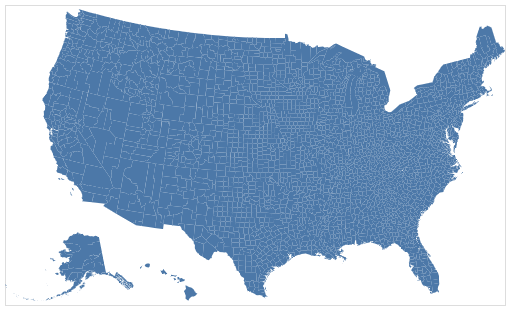

In [15]:
alt.Chart(counties).mark_geoshape().encode(
    # color='rate:Q'
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

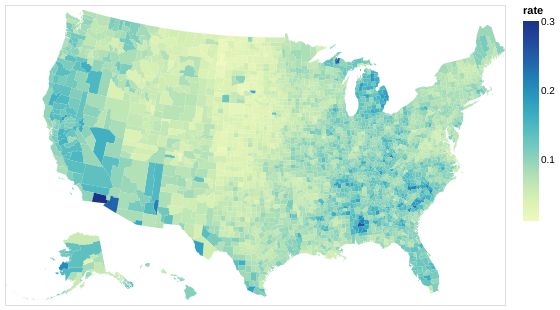

In [13]:
alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q',
    tooltip=['id:N', 'rate:Q']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)